# Part 1: Implementing Logistic Regression from Scratch

In this part of the lab, you will be requested to implement logistic regression from scratch. This means you will need to make use of gradient descent to find the parameters of the model.


In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score

In [47]:
def plot_loss(title, values):
    '''
    This function will allow us to check the evolution of the loss function during gradient descent
    Inputs:
    Title - title of the plot
    Values - values to be plotted
    '''
    plt.figure(figsize=(3, 3))
    plt.plot(values)
    plt.title(title)
    plt.ylabel('loss')
    plt.xlabel('iteration')
    plt.show()

For this exercise, we will make use of the function [make_classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) from scikit-learn, which generates random data for an k-class classification problem. We will use k=2 to stick to a binary classification problem.

In [48]:
X, y = make_classification(n_features=10, n_redundant=0, n_informative=6, n_classes=2, n_clusters_per_class=1, random_state=20)

## Question 1: make_classification
Check the documentation of the function to determine what is the role of the following parameters:

    1. n_redundant
    2. n_informative
    3. n_repeated

Based on your findings, how many useless features does the dataset contain?

Your answer here:
- **n_redundant**: it is the number of redundant features. These features are generated as random linear combinations of the informative features.
- **n_informative**: it is the number of informative features, basically each class is composed of a number of gaussian clusters each located around the vertices of a hypercube in a subspace of dimension n_informative. For each cluster, informative features are drawn independently from N(0, 1) and then randomly linearly combined within each cluster in order to add covariance. The clusters are then placed on the vertices of the hypercube.
- **n_repeated**: it is the the number of duplicated features, drawn randomly from the informative and the redundant features.

Since the number of redundant feature is 0 and the number of repeated is not specified (default 0), considering also that we want 10 features but only 6 of them are informative that means that 4 feature are useless.

## Exercise 1: Scaling input features
When different input features have extremely different ranges of values, it is common to rescale them so they have comparable ranges. We standardize input values by centering them to result in a zero mean and a standard deviation of one (this transformation is sometimes called the z-score). That is, if $\mu_j$ is the mean of the values of the j-th feature across the N samples in the input dataset, and $\sigma_j$ is the standard deviation of the values of features j-th across the input dataset, we can replace each feature $x_i^j$ by a new feature $x^{'j}_i$ computed as follows:

$$\mu_j = \frac{1}{N}\sum^{N}_{i=1} x_i^j$$

$$\sigma_j = \sqrt{\frac{1}{N}\sum^{N}_{i=1} x_i^j - \mu_j)^2} $$

$$x^{'j}_i = \dfrac{x_i^j - \mu_j}{\sigma_j}$$

### Task 1.1: Implement feature scaling
Implement below the function standardize, which estimates the mean and standard deviation of each feature in the dataset and then standardizes all the input features.

**Hint:** Check the documentation of the functions mean, std and divide from numpy.

In [49]:
def standardize(X, mean = None, stdev = None):
    '''
    Transforms the input data using the z-score. 
    If the mean and stdev are provided, the function only performs the transformation.
    Otherwise, it first estimates the mean and standard deviation
    Inputs:
    X- Data to standardize
    mean - vector with means of each feature (default None)
    stdev - vector with standard deviation of each feature (default None)
    Outputs:
    X_stand - Standardized data
    mean - Mean of the data
    stdev - standard deviation of the data
    '''
    #YOUR CODE HERE

    mean = np.mean(X, axis=0)
    stdev = np.std(X, axis=0)
    X_stand = (X-mean)/stdev
    
    return X_stand, mean, stdev

## Exercise 2: Implementing and Running Logistic Regression
### Task 2.1: Implement Logistic Regression
Below you will see the skeleton of the Logistic Regression class. Some of its functions have already been implemented. Have a look at them and try to understand them.

Afterwards, you will need to complete the following:

1. **function sigmoid** - Computes the sigmoid function given an input (*see slide 15 of the Logistic Regression slide deck*)

2. **function loss_function** - Estimates the cross-entropy loss given an input matrix X, a vector of labels y and the weights. Attention: In the course's slides, we estimated the loss by suming over all elements of the training set. For efficiency purposes, estimate it using matrix/vector computations. You may have a look into the linear regression lab for inspiration on how to do this

3. **function gradient_descent_step** - Performs an update of the weights for logistic regression. Using matrix notation this is expressed as:
$$ \mathbf{w}^{(\tau+1)} = \mathbf{w}^{(\tau)} + \dfrac{\alpha}{N}\mathbf{X}^T\left(\mathbf{y}-\sigma\left(\mathbf{X}\mathbf{w}\right)\right)$$

4. **function prediction** - Predicts new labels y_pred given an input matrix (*see slide 24 from Logistic regression slide deck*)


In [50]:
class LogisticRegression:
    
    def initialize_weights(self,X):
        '''
        Initializes the parameters so that the have the same dimensions as the input data + 1
        Inputs:
        X - input data matrix of dimensions N x D
        
        Outputs:
        weights - model parameters initialized to zero size (D + 1) x 1
        '''
        weights = np.zeros((X.shape[1]+1,1))
        
        return weights
    
    def initialize_X(self,X):
        '''
        Reshapes the input data so that it can handle w_0
        Inputs:
        X - input data matrix of dimensions N x D
        Outputs:
        X - matrix of size N x (D + 1)
        '''
        X = PolynomialFeatures(1).fit_transform(X) #Adds a one to the matrix so it copes with w_0
        
        return X
    
    def sigmoid(self,z):
        '''
        Implements the sigmoid function
        Input:
        z - input variable 
        
        Output:
        1/(1+exp(-z))
        '''
        # YOUR CODE HERE 
        sig = 1/(1+np.exp(-z))
        return sig
        
    def loss_function(self,X,y,w):
        '''
        Implements the cross-entropy loss. See Eq 1, Slide 21 from the Logistic Regression slide deck as a reminder.
        Note that the expression in slide 21 is not using a matrix notation. 
        Input:
        X - Input matrix of size N x (D + 1)
        y - Label vector of size N x 1
        w - Parameters vector of size (D + 1) x 1
        
        Output: 
        Estimation of the cross-entropy loss given the input, labels and parameters (scalar value)
        '''
        
        #1) Estimate Xw
        #YOUR CODE HERE
        Xw = np.dot(X,w)
        
        #2) Estimate sigmoid of Xw
         #YOUR CODE HERE
        sig_Xw = self.sigmoid(Xw)
        
        #3) estimate log(sig) and log(1-sig)
        #YOUR CODE HERE
        log_sig = np.log(sig_Xw)
        log_1_sig = np.log(1 - sig_Xw)
        
        #4) Combine point 3 with the labels and sum over all elements to obtain the final estimate
        loss =  -((y*log_sig + (1-y)*log_1_sig).sum())
        
        return loss
    
    def gradient_descent_step(self,X, y, w, alpha):
        '''
        Implements a gradient descent step for logistic regression
        Input:
        X - Input matrix of size N x (D + 1)
        y - Label vector of size N x 1
        w - Parameters vector of size (D + 1) x 1
        alpha - Learning rate 
        Output: 
        Updated weights
        '''
        Xw = np.dot(X,w)
        w = w + (alpha)*np.dot(X.T,(y-self.sigmoid(Xw)))/len(y)
        
        return w
    
    def fit(self,X,y,alpha=0.01,iter=10, epsilon = 0.0001):
        '''
        Learning procedure of the logistic regression model
        Input:
        X - Input matrix of size N x (D + 1)
        y - Label vector of size N x 1
        alpha - Learning rate (default value 0.01)
        iter - Number of iterations to perform for gradient descent (default 10)
        epsilon - stopping criterion (default 0.0001)
        Output: 
        List of values of the loss function during the gradient descent iterations
        '''
        weights = self.initialize_weights(X) #Initializes the weights of the model
        X = self.initialize_X(X) #reformats X
        
        
        loss_list = np.zeros(iter,) # We will store the values of the loss function as gradient descent advances
        
        for i in range(iter):
            weights = self.gradient_descent_step(X, y, weights, alpha)
            
            loss_list[i] = self.loss_function(X,y,weights)
            
            if loss_list[i] <= epsilon:
                break
            
        self.weights = weights
        
        return loss_list
    
    def predict(self,X):
        '''
        Predicts labels y given an input matrix X
        Input: 
        X- matrix of dimensions N x D
        
        Output:
        y_pred - vector of labels (dimensions N x 1)
        '''
        #1) Reformat the matrix X
        #YOUR CODE HEREX)
        X_new = self.initialize_X(X)
        
        #2) Estimate Xweights
        #YOUR CODE HERE
        Xw = np.dot(X_new, self.weights)
        
        #3) Use slide 24 from the slide deck to assign the labels y
        #YOUR CODE HERE
        y_pred = (Xw>0)
        
        return y_pred.astype(int)
        

We are now ready to test your implementation of Logistic Regression. Go through the different steps below and understand what exactly is being done. 

In [51]:
#First we split the data into two sets: training and testing (no validation set in this lab)
X_tr, X_te, y_tr, y_te = train_test_split(X,y,test_size=0.1, random_state=20)

# Next we standardize the training set
X_tr, mean, std = standardize(X_tr)

# The test input features are standardized using the mean and std computed on the training set 
X_te, _, _ = standardize(X_te, mean, std)

#We initialize the logistic regression class
logistic = LogisticRegression() 

y_tr = y_tr.reshape((len(X_tr),1))
y_te = y_te.reshape((len(X_te),1))
#We fit the model using a learning rate of 0.01 and 500 iterations
values = logistic.fit(X_tr,y_tr, 0.01, 500)      

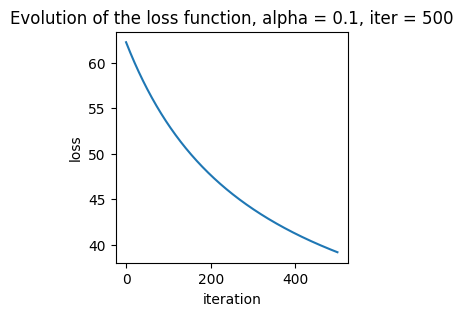

In [52]:
plot_loss('Evolution of the loss function, alpha = 0.1, iter = 500', values)

Now, we estimate labels for the training and the testing dataset. Then we will assess the performance using the [F1-score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)

In [53]:
y_train_pred = logistic.predict(X_tr)
y_test_pred = logistic.predict(X_te)

print(f'Performance in the training set:{f1_score(y_tr, y_train_pred)}\n')
print(f'Performance in the test set:{f1_score(y_te, y_test_pred)}\n')

Performance in the training set:0.8636363636363636

Performance in the test set:0.4000000000000001



How does your model perform? Are you satisfied? Comment

Your answer here:
The F1-Score is the balanced F-score that can be interpreted as a harmonic mean of the precision and recall. The F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:
F1 = 2 * (precision * recall) / (precision + recall).
Since it reaches its best value at 1 the results obtained around 0.66 can be considered bad, but it depends on data we are analyzing because running different time the result may be also good, so it is diffucult to say how our model perform.

### Task 2.2: Varying the learning rate and the number of iterations
Run multiple times the fit function, using different values of the learning rate (0.001 and 0.1) and the iterations (500 and 1000). Comment on your results.

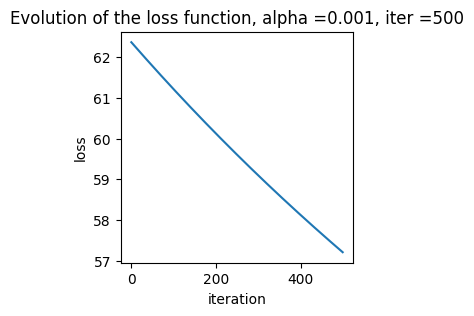

Performance in the training set:0.8260869565217391

Performance in the test set:0.4000000000000001



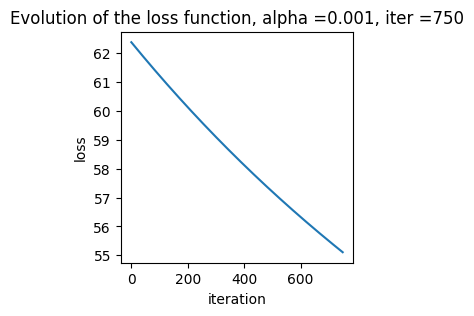

Performance in the training set:0.8351648351648352

Performance in the test set:0.4000000000000001



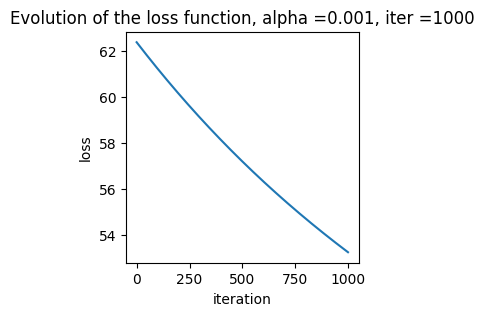

Performance in the training set:0.8636363636363636

Performance in the test set:0.4000000000000001



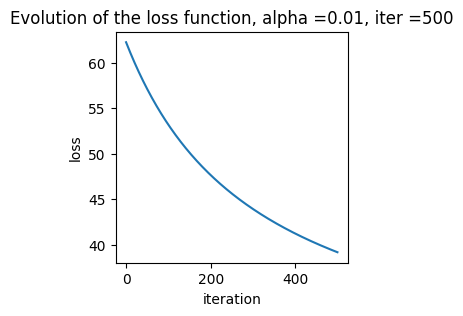

Performance in the training set:0.8636363636363636

Performance in the test set:0.4000000000000001



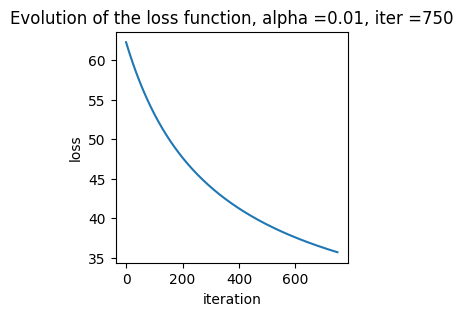

Performance in the training set:0.853932584269663

Performance in the test set:0.4444444444444445



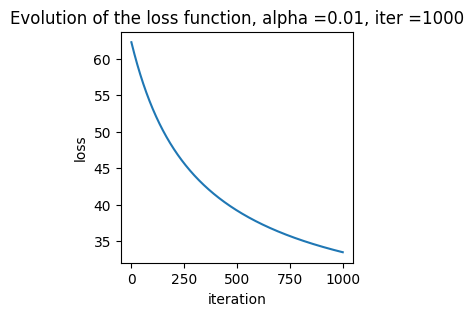

Performance in the training set:0.8666666666666667

Performance in the test set:0.4444444444444445



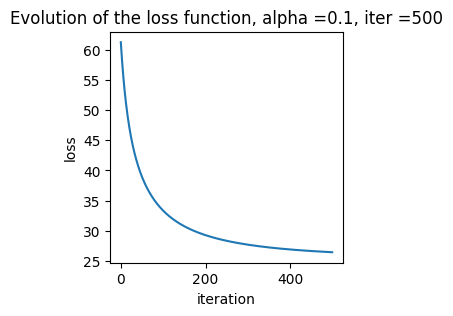

Performance in the training set:0.853932584269663

Performance in the test set:0.4444444444444445



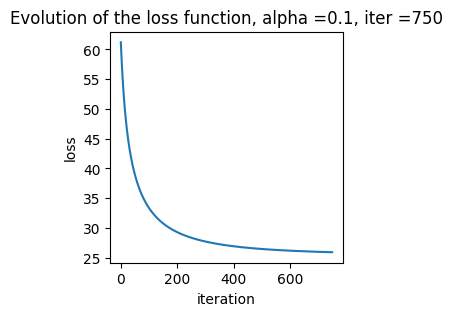

Performance in the training set:0.853932584269663

Performance in the test set:0.4444444444444445



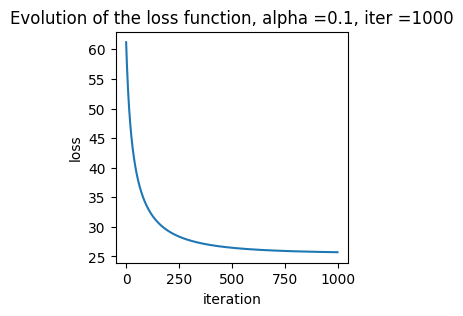

Performance in the training set:0.8666666666666667

Performance in the test set:0.4444444444444445



In [54]:
#CODE HERE
for alpha in [0.001, 0.01, 0.1]:
    for iter in [500, 750 ,1000]:
        #We fit the model using a learning rate of 0.01 and 500 iterations
        values = logistic.fit(X_tr,y_tr, alpha, iter)  
        plot_loss('Evolution of the loss function, alpha ='+str(alpha)+', iter ='+str(iter), values)
        y_train_pred = logistic.predict(X_tr)
        y_test_pred = logistic.predict(X_te)

        print(f'Performance in the training set:{f1_score(y_tr, y_train_pred)}\n')
        print(f'Performance in the test set:{f1_score(y_te, y_test_pred)}\n')


Comment on the obtained curves. How does the behavior of the loss changes?

Your answer here: 
It is possible to notice that with a bigger learning rate we arrive to minimum values of the loss in less iteration, but this could lead to a bad behaviour while searching for the minimum during the iteration, for example when the gradient start bouncing from big to small values. That is why using a smaller learning rate is better to achieve our result even though we need a bigger number of iterations. In general the loss with an increasing number of iteration decrease until it reaches asintotic behaviour.

## Optional Exercise: Changing the Properties of the Data (Bonus point)
Play around with the make_classification function by varying the number of redundant, repeated and informative features. For each new dataset you generate, train the logistic regression classifier. Comment on the results you obtained. What happens when there are too many redundant and/or repeated features? Too many random ones? How does the number of informative features affect the quality of the classifier?

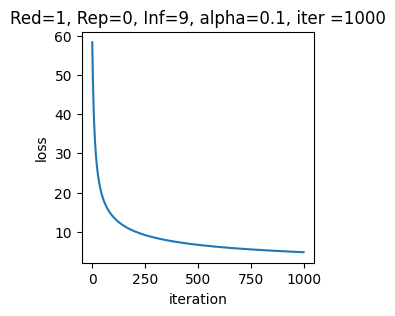

Performance in the training set:1.0

Performance in the test set:0.888888888888889



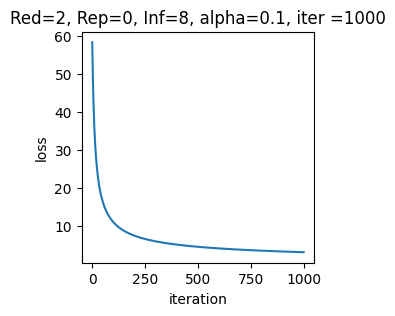

Performance in the training set:1.0

Performance in the test set:1.0



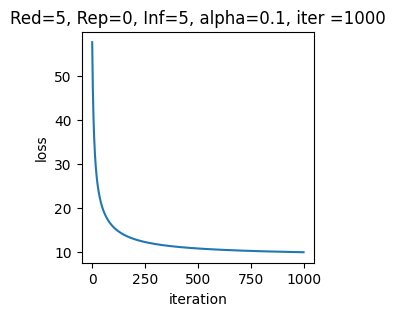

Performance in the training set:0.9555555555555556

Performance in the test set:0.9090909090909091



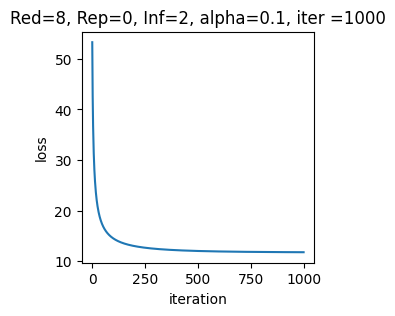

Performance in the training set:0.9438202247191012

Performance in the test set:0.75



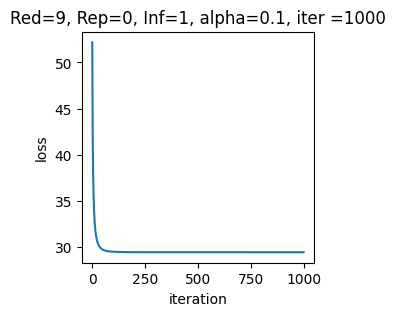

Performance in the training set:0.851063829787234

Performance in the test set:0.888888888888889



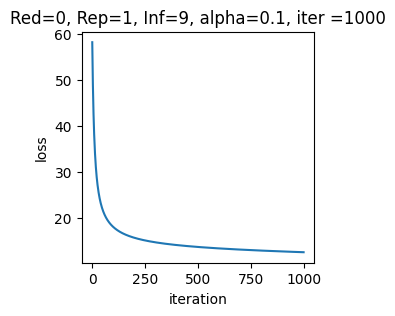

Performance in the training set:0.9545454545454546

Performance in the test set:0.923076923076923



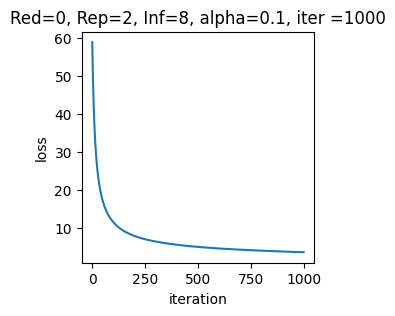

Performance in the training set:1.0

Performance in the test set:1.0



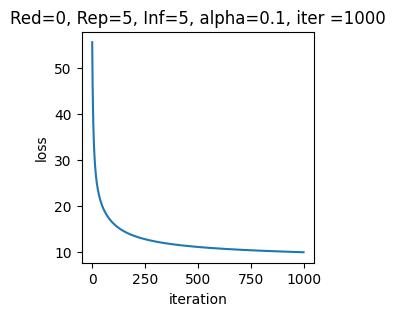

Performance in the training set:0.9662921348314608

Performance in the test set:0.9090909090909091



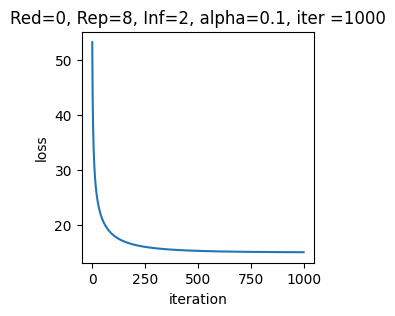

Performance in the training set:0.924731182795699

Performance in the test set:0.7499999999999999



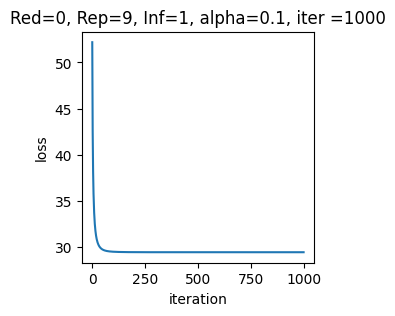

Performance in the training set:0.851063829787234

Performance in the test set:0.888888888888889



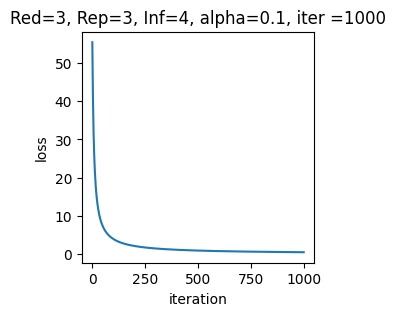

Performance in the training set:1.0

Performance in the test set:1.0



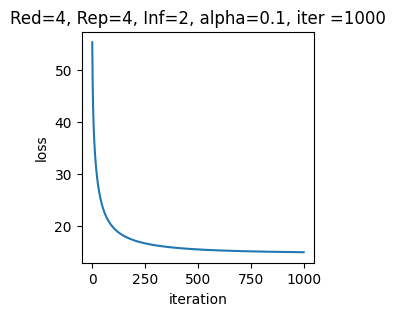

Performance in the training set:0.9545454545454545

Performance in the test set:0.9090909090909091



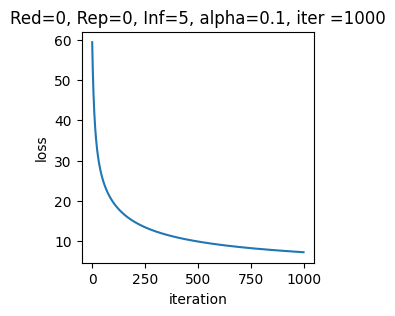

Performance in the training set:1.0

Performance in the test set:0.9090909090909091



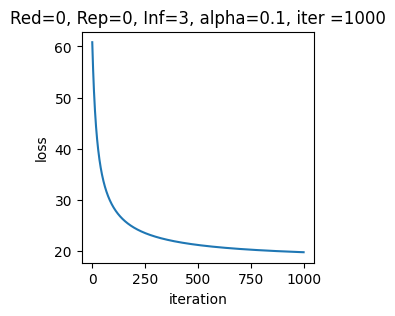

Performance in the training set:0.9148936170212766

Performance in the test set:0.888888888888889



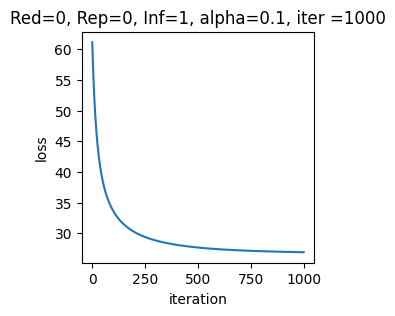

Performance in the training set:0.8817204301075269

Performance in the test set:1.0



In [66]:
n_inf = [9, 8, 5, 2, 1, 9, 8, 5, 2, 1, 4, 2, 5, 3, 1]
n_red = [1, 2, 5, 8, 9, 0, 0, 0, 0, 0, 3, 4, 0, 0, 0]
n_rep = [0, 0, 0, 0, 0, 1, 2, 5, 8, 9, 3, 4, 0, 0, 0]

for ind in range(0, len(n_inf)):
    X, y = make_classification(n_features=10, n_redundant=n_red[ind], n_informative=n_inf[ind], n_repeated=n_rep[ind], n_classes=2, n_clusters_per_class=1, random_state=20)

    #First we split the data into two sets: training and testing (no validation set in this lab)
    X_tr, X_te, y_tr, y_te = train_test_split(X,y,test_size=0.1, random_state=20)

    # Next we standardize the training set
    X_tr, mean, std = standardize(X_tr)

    # The test input features are standardized using the mean and std computed on the training set 
    X_te, _, _ = standardize(X_te, mean, std)

    #We initialize the logistic regression class
    logistic = LogisticRegression() 

    y_tr = y_tr.reshape((len(X_tr),1))
    y_te = y_te.reshape((len(X_te),1))
    #We fit the model using a learning rate of 0.01 and 500 iterations
    values = logistic.fit(X_tr,y_tr, 0.01, 500)   

    #We fit the model using a learning rate of 0.01 and 500 iterations
    values = logistic.fit(X_tr,y_tr, alpha, iter)  
    plot_loss('Red='+str(n_red[ind])+', Rep='+str(n_rep[ind])+', Inf='+str(n_inf[ind])+', alpha='+str(alpha)+', iter ='+str(iter), values)
    y_train_pred = logistic.predict(X_tr)
    y_test_pred = logistic.predict(X_te)
    print(f'Performance in the training set:{f1_score(y_tr, y_train_pred)}\n')
    print(f'Performance in the test set:{f1_score(y_te, y_test_pred)}\n')


## Analysis
We started with a big number of informative features checking the behaviour of the loss with an increasing number of redundant feature at first, then an increasing number of repeated features, then an increasing number of both and in conclusion I considered only the useless feauture.

- We can see that an increasing number of redundant feature decrease the performance on the test set in the case of 8 redundant and 2 informative the performance on the test set are bad. This may be due to the fact that the redundant features are linear combination of the two informative features not giving us more information on which we can make prediction of our sample, also we are in a 10 dimensional space, but just 2 dimension are useful for our task.

- We can see that an increasing number of repeated feature decrease the performance on the test set in the case of 8 repeated and 2 informative the performance on the test set are bad. This may be due to the fact that the repeated feature are taken from the other and in similarly as before this do not add any important information for our task.

- Useless feature instead does not change the performance of the model.